# Capítulo 5. Máquinas de Soporte de Vectores


## <span style="color:green">1. Clasificación Lineal con SVM</span>

In [13]:
#Importar las librerias numpy, pandas, matplotlib 📚
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Las máquinas de vectores de soporte depende de que los datos esten bien escalados 👀

In [14]:
#Importar los datos a necesitar, en este caso, sobre si fueron seleccionados o no para un trabajo. 
#La variable gmat tiene un rango de número más elevado en comparación a las otras variables
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
             'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
             'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
             'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
          }
df = pd.DataFrame(candidates, columns=['gmat', 'gpa', 'work_experience', 'admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


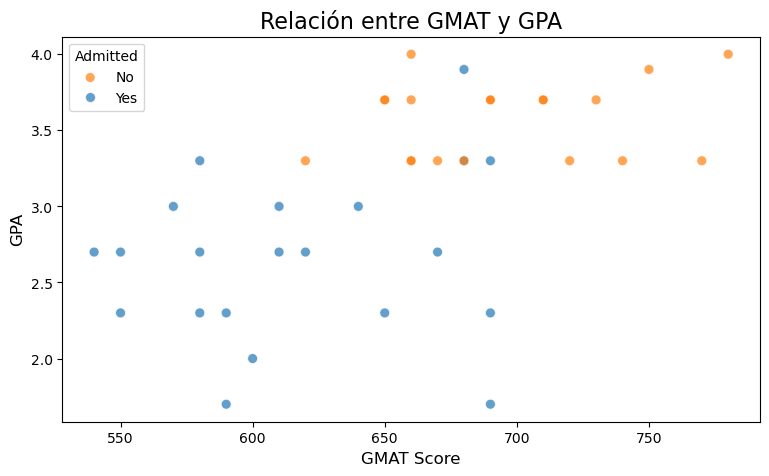

In [15]:
#Visualiza los datos de trabajo
fig, axs = plt.subplots(1, 1, figsize=(9, 5))
sns.scatterplot(data=df, x="gmat", y='gpa', hue='admitted', ax=axs, s=50, color='Blue', alpha=0.7)
axs.set_title('Relación entre GMAT y GPA', fontsize=16)
axs.set_xlabel('GMAT Score', fontsize=12)
axs.set_ylabel('GPA', fontsize=12)
axs.legend(title='Admitted', loc='upper left', labels=['No', 'Yes'])
plt.show()

In [16]:
#Separar los datos a predictores y los predichos
X = df[['gmat', 'gpa', 'work_experience']]
y = df['admitted']

In [17]:
#Haz un pipeline para escalar los datos utilizando StandarScaler y un Kernel Lineal
pipeline = Pipeline([
    ("Escalar", StandardScaler()),
    #SVC=Support Vector Classifier
    ("SVC", SVC(kernel='linear', C=1)),
])

In [18]:
#Ejecutar el pipeline
pipeline.fit(X, y)

Pipeline(steps=[('Escalar', StandardScaler()),
                ('SVC', SVC(C=1, kernel='linear'))])

In [19]:
#Haz una predicción de un sujeto aleatorio para ver que todo marche bien 👍🏼
pipeline.predict([[720, 3.9, 5]])

c:\Users\miker\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

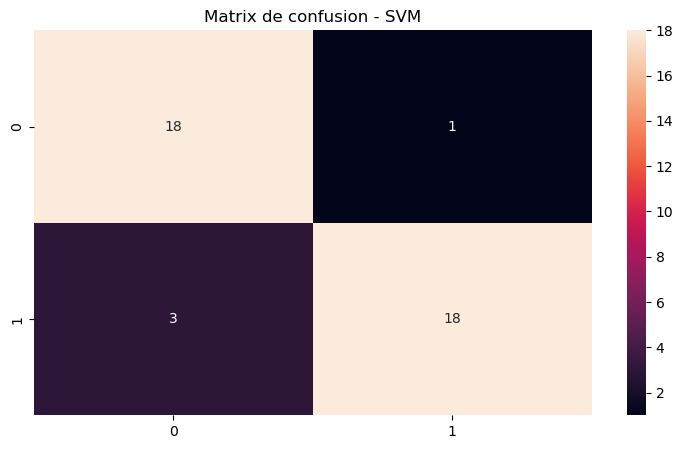

In [20]:
#Evaluar el clasificador  con una matriz de confusión 
from sklearn.metrics import confusion_matrix, f1_score

y_pred = pipeline.predict(X)

cm = confusion_matrix(y_pred, y)

fig, axs = plt.subplots(1, 1, figsize=(9, 5))
sns.heatmap(cm, annot=True, ax=axs)
plt.title("Matrix de confusion - SVM")
plt.show()

#En este caso no hay diferencia

In [21]:
#Sacar el f1_score 
f1_score(y_pred, y)

0.9

***

## <span style="color:green">2. Clasificador No Lineal con SVM</span>

#### <span style="color:blue"> 2.1 Kernel Polinomial</span>

In [22]:
#Importar make_moons 
from sklearn.datasets import make_moons
#Hacer un set de datos artificial con make_moons, genera un poco de ruido
X, y = make_moons(n_samples=100, noise=0.15)

In [35]:
#Visualizar x, y 👀
X

array([[ 0.54600173,  0.95738846],
       [-0.48283677,  0.8814896 ],
       [-0.87078866,  0.04581653],
       [ 1.37078535, -0.27274204],
       [ 0.25876448,  1.12547712],
       [ 0.57529762, -0.27492492],
       [ 0.93661499, -0.62640747],
       [ 1.72426767,  0.32523962],
       [ 0.7811952 , -0.48095068],
       [-0.8276453 ,  0.3489446 ],
       [ 1.83452877, -0.2449521 ],
       [-0.89028001,  0.20596739],
       [ 1.84164989, -0.11505979],
       [-0.38678868,  0.76344338],
       [ 0.23300516,  0.97845494],
       [ 2.02589542,  0.18232088],
       [ 0.08180274,  0.89760954],
       [-0.24142524,  0.72007362],
       [ 0.21273136,  0.03496405],
       [ 0.11394135, -0.14685224],
       [ 0.40761865, -0.12086904],
       [ 1.75228788,  0.57480751],
       [ 0.91549217,  0.9726197 ],
       [ 1.7994995 , -0.31170927],
       [ 1.78425133,  0.00255349],
       [ 0.29313133, -0.16983514],
       [ 0.22404162,  0.25043705],
       [-1.29786471, -0.02457507],
       [ 2.16768846,

Aquí, todos tendremos datos diferentes. No se alteren si no les da lo mismo que a mi. 

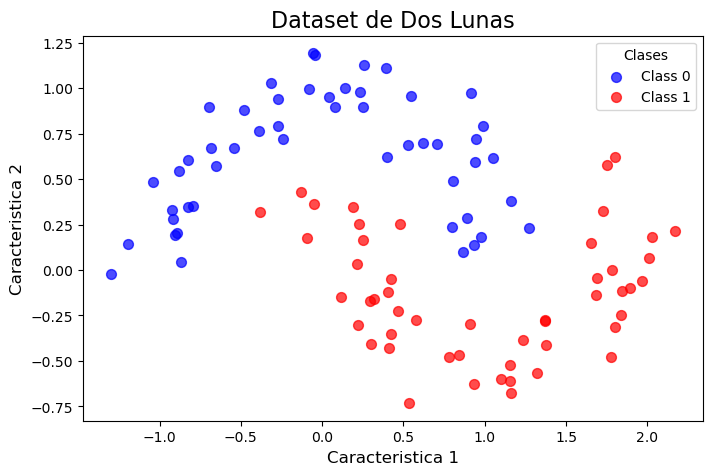

In [26]:
#Grafica el set de datos de make_moons
# Crear la figura y los ejes
fig, axs = plt.subplots(figsize=(8, 5))

#Definir colores de los puntos
colors = ["blue", "red"]

for class_value in range(2):
    #Esto serán las coordenadas 
    row_ix = np.where(y == class_value)
    axs.scatter(X[row_ix, 0], X[row_ix, 1], c=colors[class_value], label=f'Class {class_value}', s=50, alpha=0.7)

# Configurar titulo y etiquetas de los ejes
axs.set_title('Dataset de Dos Lunas', fontsize=16)    
axs.set_xlabel('Caracteristica 1', fontsize=12)    
axs.set_ylabel('Caracteristica 2', fontsize=12)    

# Añadir leyenda
axs.legend(title='Clases')
plt.show()

In [65]:
#Haz un pipeline donde aplicarás un kernel polinomial 
svc_pipeline = Pipeline([
    ("Escalar", StandardScaler()),
    ("SVC", SVC(kernel='poly', C=5, degree=4, coef0=1))
])

Como es un kernel polinomial, tienes que especificar el grado del mismo. 

In [66]:
#Ejecutar el pipeline
svc_pipeline.fit(X, y)

Pipeline(steps=[('Escalar', StandardScaler()),
                ('SVC', SVC(C=5, coef0=1, degree=4, kernel='poly'))])

In [67]:
#Predecir ahora con este pipeline para ver que todo marche bien
y_pred = svc_pipeline.predict(X)

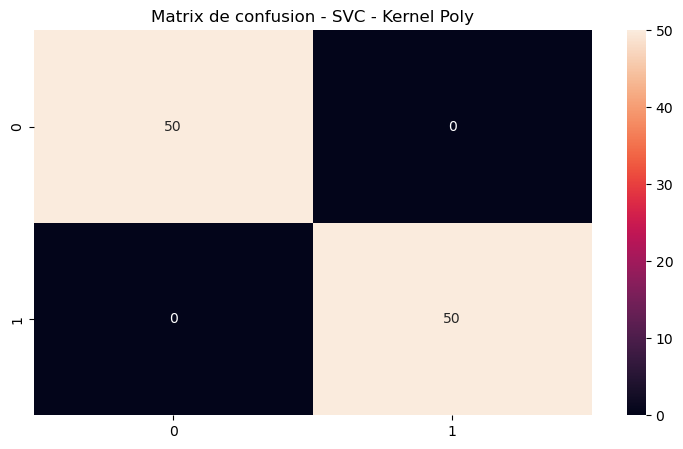

In [68]:
#Evaluar el clasificador con una matriz de confusión 
cm = confusion_matrix(y_pred, y)

fig, axs = plt.subplots(1, 1, figsize=(9, 5))
sns.heatmap(cm, annot=True, ax=axs)
plt.title("Matrix de confusion - SVC - Kernel Poly")
plt.show()

In [69]:
#Sacar el f1_score 
print(f"F1: {f1_score(y_pred, y)}")

F1: 1.0


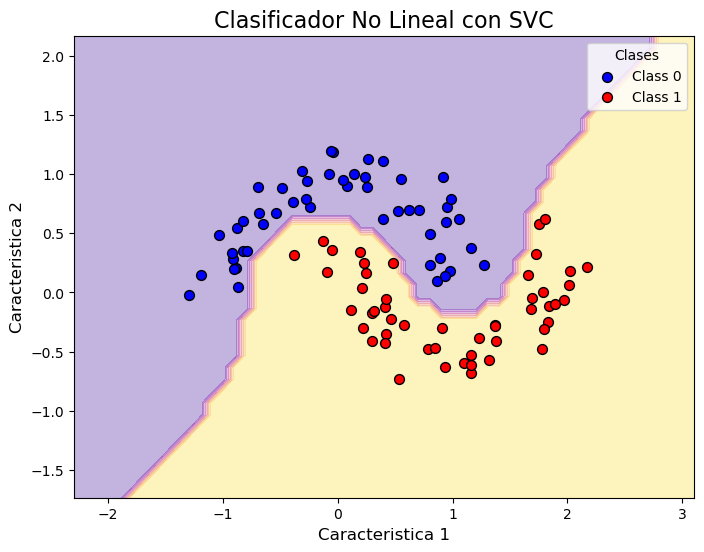

In [70]:
#Hacer la gráfica para visualizar el clasificador no lineal 
# crear la malla para la visualizacion del limite de decision
min1, max1 = X[:, 0].min() - 1, X[:, 0].max() + 1
min2, max2 = X[:, 1].min() - 1, X[:, 1].max() + 1
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy =  np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1, r2))

# Predecir los valores de la malla
svc_pipeline.fit(X, y)
yhat = svc_pipeline.predict(grid)
zz = yhat.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(8, 6))

# Dibujar el limite de decision

contour = ax.contourf(xx, yy, zz, alpha=0.3, cmap='plasma')

# Dibujar los puntos de datos
colors = ['blue', 'red']

for class_value in range(2):
    row_ix = np.where(y == class_value)
    ax.scatter(X[row_ix, 0], X[row_ix, 1], c=colors[class_value], label=f'Class {class_value}', edgecolors='k', s=50)

# Configurar titulo y etiquetas de los ejes
ax.set_title('Clasificador No Lineal con SVC', fontsize=16)
ax.set_xlabel('Caracteristica 1', fontsize=12)
ax.set_ylabel('Caracteristica 2', fontsize=12)

# Añadir leyenda
ax.legend(title='Clases')

plt.show()

Ejercicio: Varía el grado en el polinomio para evaluar la gráfica que despliega acorde al clasificador 👀. 
Por ejemplo, grado 3.

***

#### <span style="color:blue"> 2.2 Kernel RBF Gaussiano</span>

In [71]:
#Hacer un pipeline con StandarScaler pero ahora con un Kernel RBF
rbf = Pipeline([
    ("Escalar", StandardScaler()),
    ("SVC", SVC(kernel='rbf', C=5, gamma=5))
])

gamma es un parámetro de regularización. **Sobreajuste**= Reducir gamma. **Subajuste**=Aumentar gamma

In [72]:
#Ejecutar el pipeline
rbf.fit(X, y)

Pipeline(steps=[('Escalar', StandardScaler()), ('SVC', SVC(C=5, gamma=5))])

In [73]:
#Predecir ahora con este pipeline para ver que todo marche bien
y_pred = rbf.predict(X)

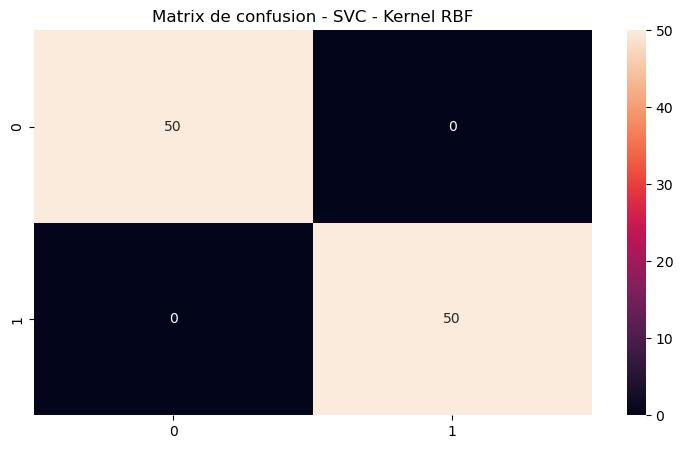

In [75]:
#Evaluar el clasificador con una matriz de confusión 
cm = confusion_matrix(y_pred, y)

fig, axs = plt.subplots(1, 1, figsize=(9, 5))
sns.heatmap(cm, annot=True, ax=axs)
plt.title("Matrix de confusion - SVC - Kernel RBF")
plt.show()

In [76]:
print("F1: ", f1_score(y_pred, y))

F1:  1.0


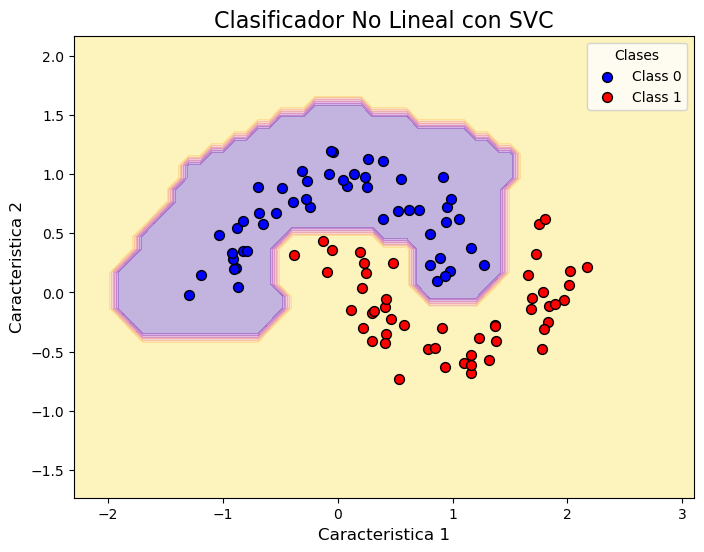

In [77]:
#Hacer la gráfica para visualizar el clasificador no lineal
min1, max1 = X[:, 0].min() - 1, X[:, 0].max() + 1
min2, max2 = X[:, 1].min() - 1, X[:, 1].max() + 1
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy =  np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1, r2))

# Predecir los valores de la malla
rbf.fit(X, y)
yhat = rbf.predict(grid)
zz = yhat.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(8, 6))

# Dibujar el limite de decision

contour = ax.contourf(xx, yy, zz, alpha=0.3, cmap='plasma')

# Dibujar los puntos de datos
colors = ['blue', 'red']

for class_value in range(2):
    row_ix = np.where(y == class_value)
    ax.scatter(X[row_ix, 0], X[row_ix, 1], c=colors[class_value], label=f'Class {class_value}', edgecolors='k', s=50)

# Configurar titulo y etiquetas de los ejes
ax.set_title('Clasificador No Lineal con SVC', fontsize=16)
ax.set_xlabel('Caracteristica 1', fontsize=12)
ax.set_ylabel('Caracteristica 2', fontsize=12)

# Añadir leyenda
ax.legend(title='Clases')

plt.show()

Ejercicio: varía los hiperparametros, es decir **gamma y C**. 
Observa los resultados y analiza.

***

### <span style="color:green"> 3. Regresión con SVM</span>

#### <span style="color:blue"> 3.1 Regresión Lineal </span>

In [ ]:
#Importar SVR= Supporr Vector Regressor  
from sklearn.svm import LinearSVR
svm = Pipeline([
    ("escalar", StandardScaler()),
    ("svr", LinearSVR(epsilon=1.5))
])

#### <span style="color:blue"> 3.2 Regresión Polinomial </span>

In [ ]:
#Tambiém se puede hacer regresiones polinomiales
from sklearn.svm import SVR
svm = Pipeline([
    ("escalar", StandardScaler()),
    ("svr", SVR(kernel="poly", degree=3,epsilon=1.5))
])